In [103]:
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv('data/train.csv', header=0, parse_dates=True, squeeze=True)


NameError: name 'read_csv' is not defined

In [2]:
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


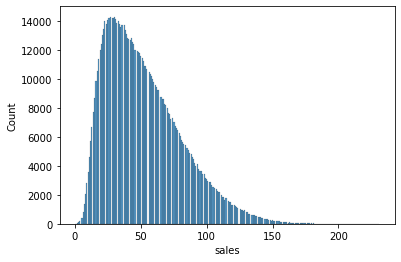

In [3]:
import seaborn as sns

sns.histplot(x = 'sales', data = train_df, palette = 'hls')

In [110]:
train_df['date'] = pd.to_datetime(train_df['date'])

In [111]:
train_df['Year'] = train_df['date'].dt.year
train_df['Month'] = train_df['date'].dt.month

In [6]:
store_year_sales = train_df.groupby(['store', 'Year']).sum()
store_year_sales.reset_index(inplace = True)
store_year_sales

,store,Year,item,sales,Month
0,1,2013,465375,717840,119100
1,1,2014,465375,826786,119100
2,1,2015,465375,861710,119100
3,1,2016,466650,937493,119200
4,1,2017,465375,971774,119100
5,2,2013,465375,1020238,119100
6,2,2014,465375,1171797,119100
7,2,2015,465375,1222184,119100
8,2,2016,466650,1329523,119200
9,2,2017,465375,1376386,119100


Text(0.5, 1.0, 'Sales over the years')

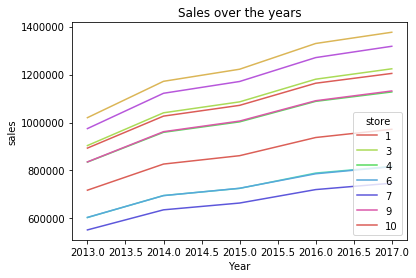

In [7]:
plt_sys = sns.lineplot(x = 'Year', y='sales', hue='store', data = store_year_sales, palette='hls')
plt_sys.set_title('Sales over the years')

In [8]:
store_month_sales = train_df.groupby(['store', 'Year', 'Month']).sum()
store_month_sales.reset_index(inplace = True)
store_month_sales
plt_sys.set_title('Sales over the years')

Text(0.5, 1, 'Sales over the years')

Text(0.5, 1.0, 'Sales over months in a year')

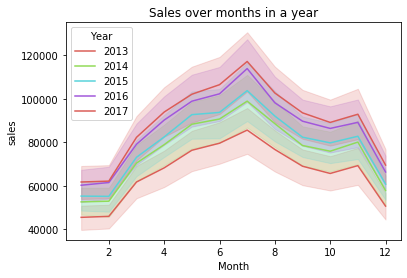

In [9]:
plt_sym = sns.lineplot(x = 'Month', y='sales', hue='Year', data = store_month_sales, palette='hls')
plt_sym.set_title('Sales over months in a year')

For every store the sales grow during the month of July.
The sales ascend to the middle of the year and declines therafter

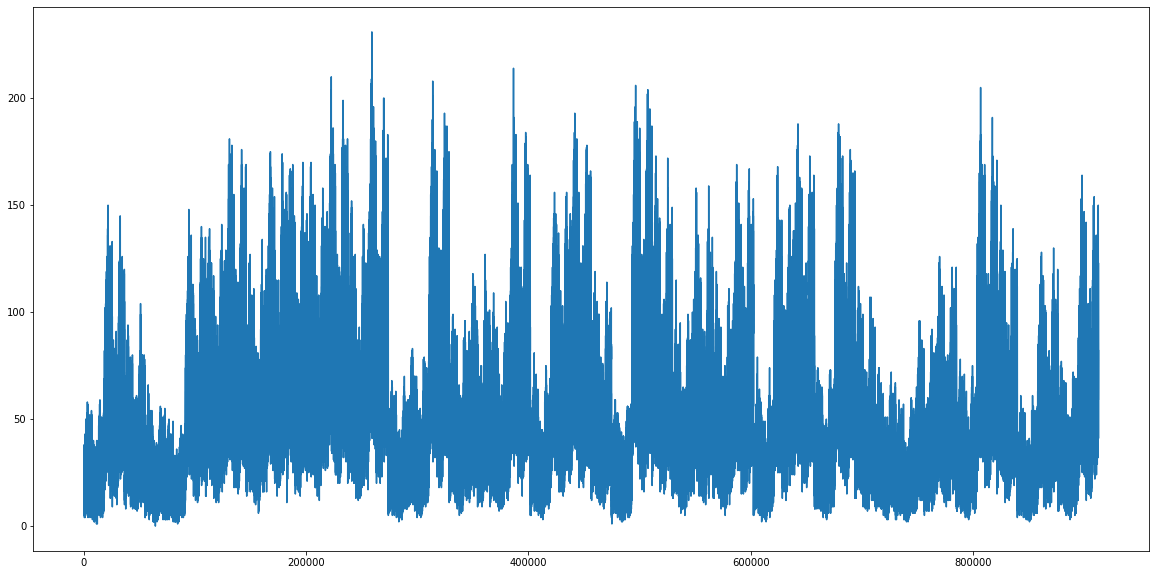

In [14]:
plt.rcParams["figure.figsize"]=20,10
train_df['sales'].plot()
plt.show()

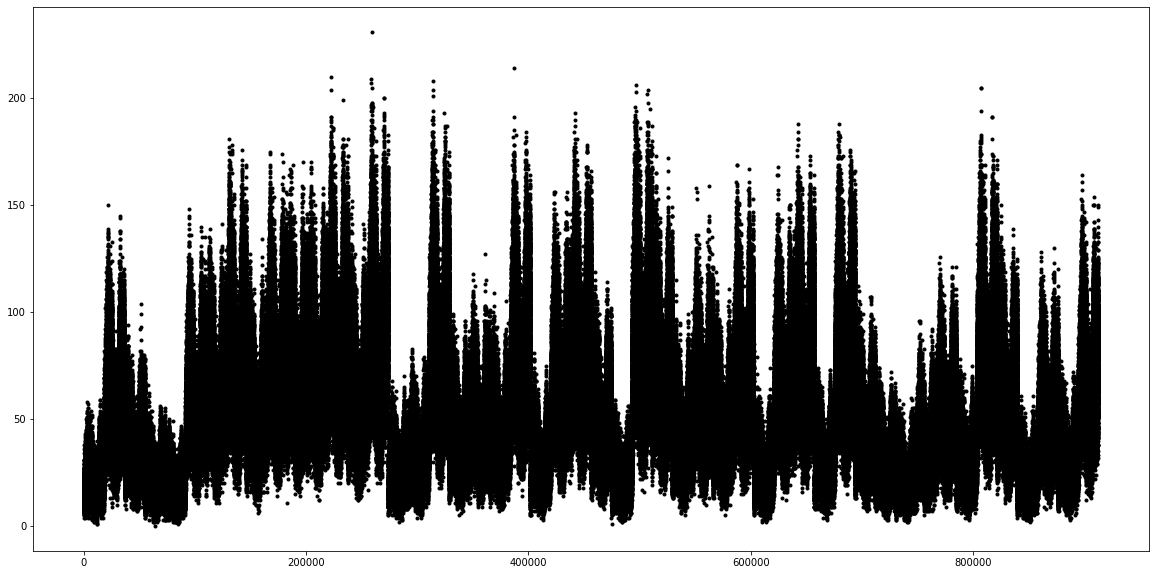

In [16]:
train_df['sales'].plot(style='k.')
plt.show()

In [124]:
import numpy as np
# from pandas import read_csv
# from pandas import DataFrame
# from pandas import Grouper
# from matplotlib import pyplot
# train_df['date']  = pd.to_datetime(train_df['date'],format='%Y-%m-%d')
# train_df.set_index('date', inplace = True)
groups = train_df[(train_df.store == 1) & (train_df.item == 1)]['sales'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    print(name.year)
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show()

2013
2014
2015
2016


ValueError: Length of values does not match length of index

In [99]:
years

,2013,2014,2015,2016,2017


In [79]:
# sample_df['Date']  = pd.to_datetime(sample_df['Date'],format='%Y-%b-%d')
# sample_df.set_index('Date', inplace = True)
groups = sample_df.groupby(pd.Grouper(freq='A'))


1981
1982
1983
1984
1985
1986
1987
1988
1989
1990


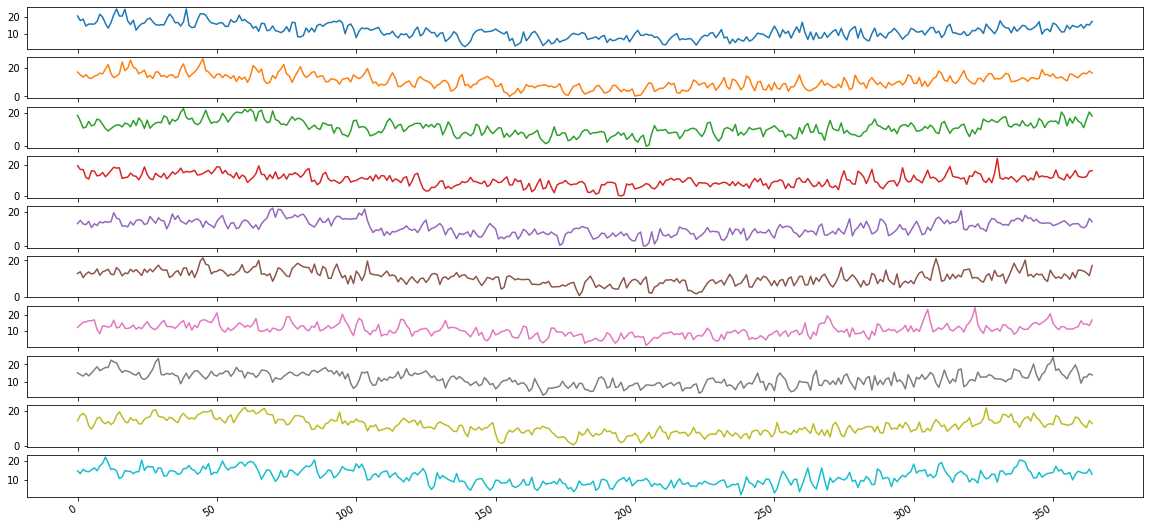

In [120]:
series = pd.read_csv('data/sample_temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    print(name.year)
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show()

In [116]:
groups = train_df[(train_df.store == 1) & (train_df.item == 1)]['sales'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    print(group.values)
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show()

[13 33 15 ... 23 15 30]
[ 9 33 21 ... 35 12 39]
[11 36 18 ... 41 24 43]
[21 32 23 ... 38 22 58]


ValueError: Length of values does not match length of index

In [113]:
train_df['date']  = pd.to_datetime(train_df['date'],format='%Y-%m-%d')
train_df.set_index('date', inplace = True)
train_df[train_df.store == 1]['sales']


date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
2013-01-06    12
2013-01-07    10
2013-01-08     9
2013-01-09    12
2013-01-10     9
2013-01-11     9
2013-01-12     7
2013-01-13    10
2013-01-14    12
2013-01-15     5
2013-01-16     7
2013-01-17    16
2013-01-18     7
2013-01-19    18
2013-01-20    15
2013-01-21     8
2013-01-22     7
2013-01-23     9
2013-01-24     8
2013-01-25    14
2013-01-26    12
2013-01-27    12
2013-01-28    11
2013-01-29     6
2013-01-30     9
              ..
2017-12-02    60
2017-12-03    59
2017-12-04    31
2017-12-05    48
2017-12-06    35
2017-12-07    44
2017-12-08    53
2017-12-09    56
2017-12-10    63
2017-12-11    31
2017-12-12    43
2017-12-13    61
2017-12-14    53
2017-12-15    46
2017-12-16    63
2017-12-17    69
2017-12-18    36
2017-12-19    48
2017-12-20    63
2017-12-21    53
2017-12-22    59
2017-12-23    53
2017-12-24    67
2017-12-25    35
2017-12-26    42
2017-12-27    38
2017-12-28    52
2017-12-2

In [123]:
train_df[(train_df.store == 1) & (train_df.item == 1)]['sales'].to_csv('lolTest2.csv')